# Homework 3 - Time Series Analysis

This is a **pair-optional** assignment. Total: 20 points. Due:**<span style="color:red">  Sunday, September 21, 11:59 pm </span>**.

**Dataset**: You will be working with a dataset containing historical stock price data for **Apple (AAPL)**. However, instead of providing the dataset directly, you will retrieve the data from a financial API.<br>
**Objective**: To apply your knowledge of time series analysis using Pandas by working on real-world data.

The `dataset` includes the following columns: 
* `timestamp`: The date of the stock price. 
* `open`: The opening price of the stock on that date. 
* `high`: The highest price of the stock during the day. 
* `low`: The lowest price of the stock during the day. 
* `close`: The closing price of the stock on that date. 
* `volume`: The trading volume of the stock on that date.

<b><font color='red'> Use the following: </font></b>

**API**: https://www.alphavantage.co/query <br>
**API Parameters**:
* function: <b>TIME_SERIES_DAILY</b>
* symbol: <b>AAPL</b>
* outputsize: <b>full</b> 
* datatype: <b>csv</b><br>

**Sign up for an API key**: https://www.alphavantage.co/support/#api-key<br>
**Documentation**: https://www.alphavantage.co/documentation/#daily


In [34]:
import io
import json
import requests
import pandas as pd

#### Task 1: Send an API request to fetch historical stock price data for `Apple` (AAPL) with the response format set to `CSV`. Load the data into a DataFrame named `stock` and display the first `15` rows.

In [35]:
API_KEY = 'GI9P7Y812ELHYQ2Y'

api = 'https://www.alphavantage.co/query'
payload = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'AAPL',
    'apikey': API_KEY,
    'outputsize': 'full',
    'datatype': 'csv'
  
}

response = requests.get(api, params=payload)
stock_AAPL = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

stock = pd.DataFrame(stock_AAPL)
print(stock.head())

    timestamp     open    high      low   close     volume
0  2025-09-26  254.095  257.60  253.780  255.46   45539027
1  2025-09-25  253.205  257.17  251.712  256.87   55202075
2  2025-09-24  255.220  255.74  251.040  252.31   42303710
3  2025-09-23  255.875  257.34  253.580  254.43   60275187
4  2025-09-22  248.300  256.64  248.120  256.08  105517416


#### Task 2: Rename the `timestamp` column to `date` and set the `date` column as the DataFrame's index, ensuring the `date` column is converted to a `datetime` data type.

In [36]:
stock.rename(columns={'timestamp':'date'}, inplace=True)
stock.date = pd.to_datetime(stock.date)
print(stock['date'])

0      2025-09-26
1      2025-09-25
2      2025-09-24
3      2025-09-23
4      2025-09-22
          ...    
6511   1999-11-05
6512   1999-11-04
6513   1999-11-03
6514   1999-11-02
6515   1999-11-01
Name: date, Length: 6516, dtype: datetime64[ns]


#### Task 3: Arrange the entries in the DataFrame in `ascending` order, from the oldest to the most recent.

In [37]:
stock = stock.sort_values(by='date',ascending=True)
print(stock)
print(stock.iloc[2855])

           date     open    high      low   close     volume
6515 1999-11-01   80.000   80.69   77.370   77.62    2487300
6514 1999-11-02   78.000   81.69   77.310   80.25    3564600
6513 1999-11-03   81.620   83.25   81.000   81.50    2932700
6512 1999-11-04   82.060   85.37   80.620   83.62    3384700
6511 1999-11-05   84.620   88.37   84.000   88.31    3721500
...         ...      ...     ...      ...     ...        ...
4    2025-09-22  248.300  256.64  248.120  256.08  105517416
3    2025-09-23  255.875  257.34  253.580  254.43   60275187
2    2025-09-24  255.220  255.74  251.040  252.31   42303710
1    2025-09-25  253.205  257.17  251.712  256.87   55202075
0    2025-09-26  254.095  257.60  253.780  255.46   45539027

[6516 rows x 6 columns]
date      2011-03-09 00:00:00
open                   354.69
high                   354.76
low                     350.6
close                  352.47
volume               16189500
Name: 3660, dtype: object


#### Task 4: Calculate the difference in days (delta) between the most recent and the oldest record.

In [38]:
print((stock['date'].max() - stock['date'].min()).days)

9461


#### Task 5: Identifies `missing days` within the time period of the `stock` DataFrame's index and sorts them in `descending` order, from the most recent to the oldest. Consider using the `.difference()` function.

In [39]:
full_range = pd.date_range(start=stock['date'].min(), end=stock['date'].max())

missing_days = full_range.difference(stock['date'])

missing_days = missing_days.sort_values(ascending=False)

print(missing_days)


DatetimeIndex(['2025-09-21', '2025-09-20', '2025-09-14', '2025-09-13',
               '2025-09-07', '2025-09-06', '2025-09-01', '2025-08-31',
               '2025-08-30', '2025-08-24',
               ...
               '1999-12-04', '1999-11-28', '1999-11-27', '1999-11-25',
               '1999-11-21', '1999-11-20', '1999-11-14', '1999-11-13',
               '1999-11-07', '1999-11-06'],
              dtype='datetime64[ns]', length=2946, freq=None)


#### Task 6: Add the missing days to your DataFrame by `reindexing` it using a complete date range, spanning from the oldest to the newest date in the existing index.

In [40]:
stock = stock.set_index('date')
full_range = pd.date_range(start=stock.index.min(), end=stock.index.max())
stock = stock.reindex(full_range)
print(stock)

               open    high      low   close       volume
1999-11-01   80.000   80.69   77.370   77.62    2487300.0
1999-11-02   78.000   81.69   77.310   80.25    3564600.0
1999-11-03   81.620   83.25   81.000   81.50    2932700.0
1999-11-04   82.060   85.37   80.620   83.62    3384700.0
1999-11-05   84.620   88.37   84.000   88.31    3721500.0
...             ...     ...      ...     ...          ...
2025-09-22  248.300  256.64  248.120  256.08  105517416.0
2025-09-23  255.875  257.34  253.580  254.43   60275187.0
2025-09-24  255.220  255.74  251.040  252.31   42303710.0
2025-09-25  253.205  257.17  251.712  256.87   55202075.0
2025-09-26  254.095  257.60  253.780  255.46   45539027.0

[9462 rows x 5 columns]


#### Task 7: Identify `the number` of missing values in the new DataFrame and fill those missing values using the `forward fill` method.

In [41]:
missing_count = stock.isna().sum().sum()
print(missing_count)

stock = stock.ffill()
print(stock)


14730
               open    high      low   close       volume
1999-11-01   80.000   80.69   77.370   77.62    2487300.0
1999-11-02   78.000   81.69   77.310   80.25    3564600.0
1999-11-03   81.620   83.25   81.000   81.50    2932700.0
1999-11-04   82.060   85.37   80.620   83.62    3384700.0
1999-11-05   84.620   88.37   84.000   88.31    3721500.0
...             ...     ...      ...     ...          ...
2025-09-22  248.300  256.64  248.120  256.08  105517416.0
2025-09-23  255.875  257.34  253.580  254.43   60275187.0
2025-09-24  255.220  255.74  251.040  252.31   42303710.0
2025-09-25  253.205  257.17  251.712  256.87   55202075.0
2025-09-26  254.095  257.60  253.780  255.46   45539027.0

[9462 rows x 5 columns]


#### Task 8: Compute the average of the `open` and `close` prices for each month of the respective years.

In [42]:
monthly_avg = stock[['open', 'close']].resample('M').mean()
print(monthly_avg)

print(monthly_avg.iloc[301])
print(monthly_avg.iloc[155]) # we dont know if something is wrong with  the dataset, but the highest value is in 2014 which doesnt match our research online, which says 2024 december has the highest

                  open       close
1999-11-30   89.643667   90.590000
1999-12-31  103.900000  103.912903
2000-01-31  104.015484  103.193226
2000-02-29  111.430345  111.058966
2000-03-31  127.144194  128.723871
...                ...         ...
2025-05-31  203.281774  203.220323
2025-06-30  200.634333  200.515667
2025-07-31  211.552097  211.653871
2025-08-31  224.470645  224.646129
2025-09-30  239.381154  240.531154

[311 rows x 2 columns]
open     248.336452
close    249.464839
Name: 2024-12-31 00:00:00, dtype: float64
open     635.537419
close    629.977145
Name: 2012-10-31 00:00:00, dtype: float64


C:\Users\cxina\AppData\Local\Temp\ipykernel_61292\1178636484.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = stock[['open', 'close']].resample('M').mean()


#### Task 9: Create a time series plot of the `open` and `close` prices throughout the entire period.

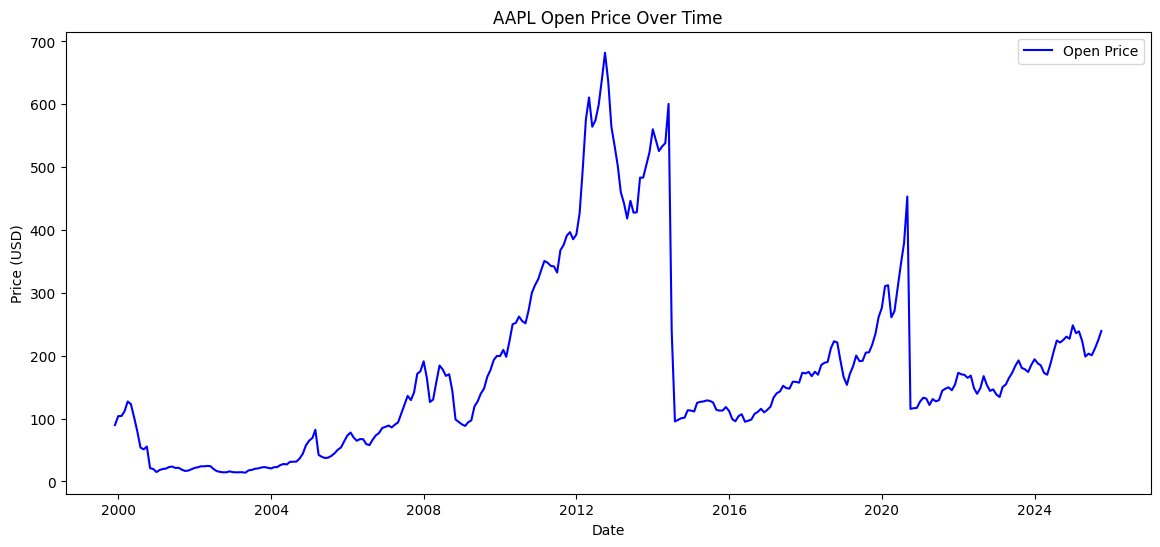

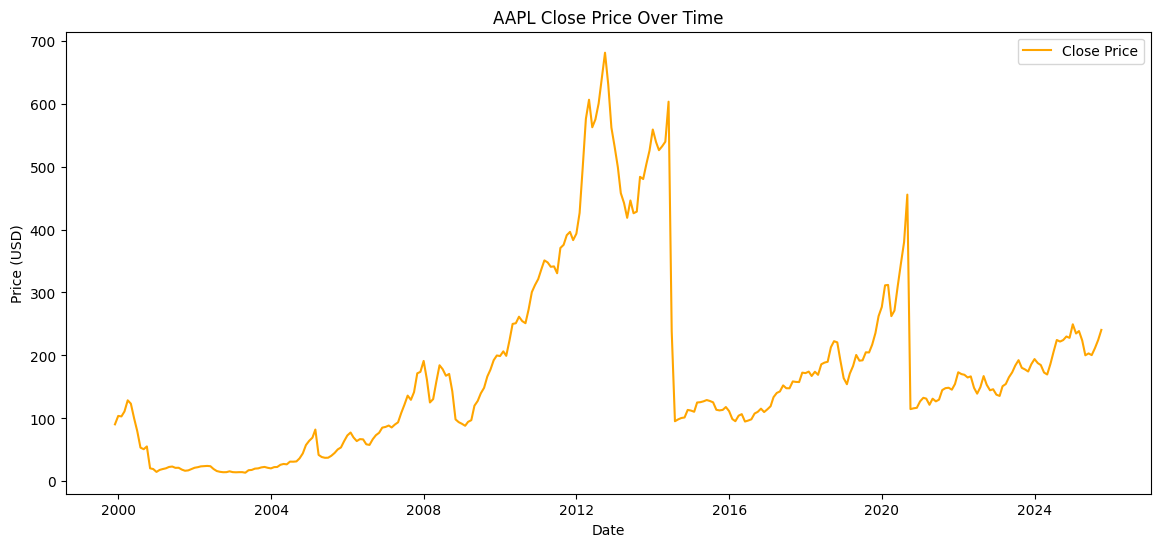

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(monthly_avg.index, monthly_avg['open'], label='Open Price', color='blue')
plt.title('AAPL Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(monthly_avg.index, monthly_avg['close'], label='Close Price', color='orange')
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


#### Task 10: Identify the `highest closing price` recorded during the entire time frame, along with the `corresponding date`, and conduct online research to understand the event that triggered this notable price surge. Provide a concise summary of the event.

In [44]:
# wariyo

#### Task 11: Resample the data from a `daily` to a `yearly` frequency, calculating the `average high price` for each resampled period. Plot the aggregated data afterward.

1999-12-31     99.367049
2000-12-31     74.027186
2001-12-31     20.698712
2002-12-31     19.541397
2003-12-31     18.801241
2004-12-31     35.888501
2005-12-31     53.378277
2006-12-31     72.032293
2007-12-31    129.771384
2008-12-31    145.093902
2009-12-31    147.896527
2010-12-31    261.627886
2011-12-31    366.891005
2012-12-31    579.875460
2013-12-31    477.569673
2014-12-31    300.950260
2015-12-31    121.180591
2016-12-31    105.327414
2017-12-31    151.225077
2018-12-31    190.623137
2019-12-31    209.691836
2020-12-31    263.809293
2021-12-31    142.141574
2022-12-31    156.865346
2023-12-31    173.796461
2024-12-31    208.996977
2025-12-31    221.862135
Freq: YE-DEC, Name: high, dtype: float64


C:\Users\cxina\AppData\Local\Temp\ipykernel_61292\2114498855.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_high = stock['high'].resample('Y').mean()


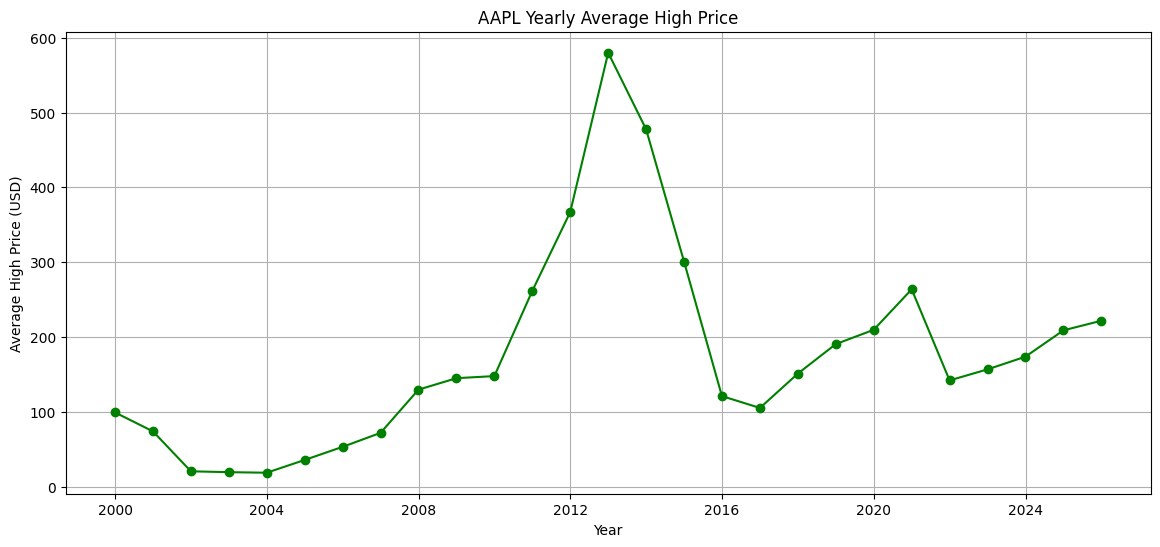

In [45]:
yearly_avg_high = stock['high'].resample('Y').mean()

print(yearly_avg_high)

plt.figure(figsize=(14,6))
plt.plot(yearly_avg_high.index, yearly_avg_high, marker='o', linestyle='-', color='green')
plt.title('AAPL Yearly Average High Price')
plt.xlabel('Year')
plt.ylabel('Average High Price (USD)')
plt.grid(True)
plt.show()

#### Task 12: Which `month`, regardless of the year, has the highest average trading `volume`? What do you think is the reason behind this?

In [46]:
monthly_volume = stock['volume'].groupby(stock.index.month).mean()
print(monthly_volume)

highest_volume_month = monthly_volume.idxmax()
print(highest_volume_month)
#9 is september, and according to historic data, september is an unpredictable month in the stock market

1     3.797876e+07
2     3.299343e+07
3     3.571740e+07
4     3.220879e+07
5     3.191460e+07
6     3.362474e+07
7     2.925759e+07
8     3.093341e+07
9     4.310212e+07
10    3.693039e+07
11    3.123448e+07
12    3.289556e+07
Name: volume, dtype: float64
9


#### Task 13: On which `date` was the greatest disparity between the `opening` and `closing` prices observed?

In [47]:
stock['disparity'] = abs(stock['open'] - stock['close'])
max_disparity_date = stock['disparity'].idxmax()
max_disparity_value = stock['disparity'].max()

print(max_disparity_date)
print(max_disparity_value)


2012-04-17 00:00:00
30.75999999999999


#### Task 14: What was the `lowest opening price` for `each year`?

In [48]:
yearly_low_open = stock['open'].resample('Y').min()
print(yearly_low_open)


1999-12-31     78.00
2000-12-31     13.78
2001-12-31     14.50
2002-12-31     13.54
2003-12-31     12.99
2004-12-31     21.35
2005-12-31     34.20
2006-12-31     51.73
2007-12-31     83.00
2008-12-31     81.93
2009-12-31     79.45
2010-12-31    192.37
2011-12-31    316.68
2012-12-31    403.51
2013-12-31    387.97
2014-12-31     90.21
2015-12-31     94.87
2016-12-31     90.00
2017-12-31    115.80
2018-12-31    148.15
2019-12-31    143.98
2020-12-31    104.54
2021-12-31    119.03
2022-12-31    127.99
2023-12-31    126.01
2024-12-31    165.35
2025-12-31    171.95
Freq: YE-DEC, Name: open, dtype: float64


C:\Users\cxina\AppData\Local\Temp\ipykernel_61292\2224715592.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_low_open = stock['open'].resample('Y').min()


#### Task 15: Produce a graph representing the `open price` column for the current month `09/2025`. If you had purchased several shares of this stock at the beginning of the month, would you consider selling or holding onto them?

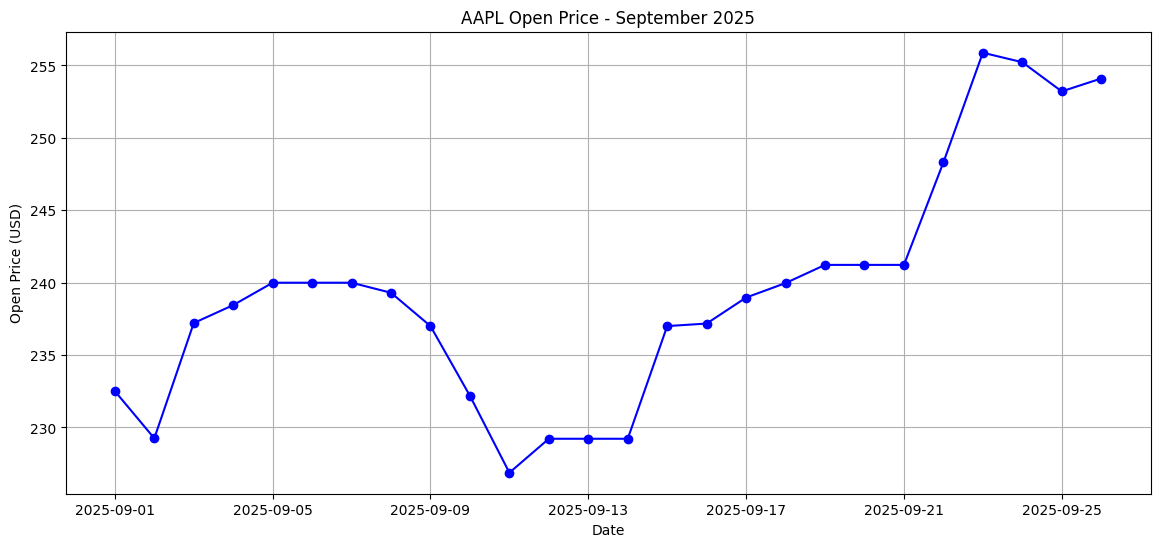

In [ ]:
current_month = stock.loc['2025-09']

plt.figure(figsize=(14,6))
plt.plot(current_month.index, current_month['open'], marker='o', linestyle='-', color='blue')
plt.title('AAPL Open Price - September 2025')
plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.grid(True)
plt.show()
#the graph appears to be going upwards, so i would hold until it is at a high point and as soon as it drops slightly, sell.


#### Task 16: What is the average `low price` over the past `seven weeks`?

In [50]:
seven_weeks_low_avg = stock['low'].last('7W').mean()
print(seven_weeks_low_avg)


233.35847021276606


C:\Users\cxina\AppData\Local\Temp\ipykernel_61292\2583278288.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  seven_weeks_low_avg = stock['low'].last('7W').mean()


#### Task 17: `Calculate` and `visualize` the rolling 30-day average `volume`.

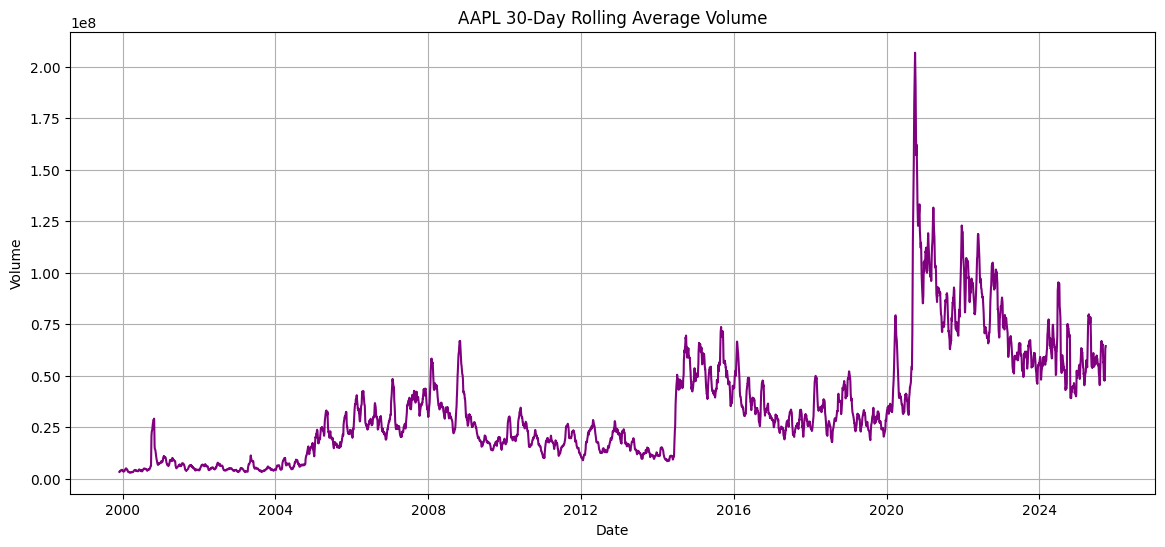

In [51]:
rolling_30d_volume = stock['volume'].rolling(window=30).mean()

plt.figure(figsize=(14,6))
plt.plot(rolling_30d_volume.index, rolling_30d_volume, color='purple')
plt.title('AAPL 30-Day Rolling Average Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


#### Task 18: Calculate the daily price changes for the `close` column. Create a new column named `PriceChange` to store these changes. Create a line plot (kind='line') to visualize the daily price changes over time.

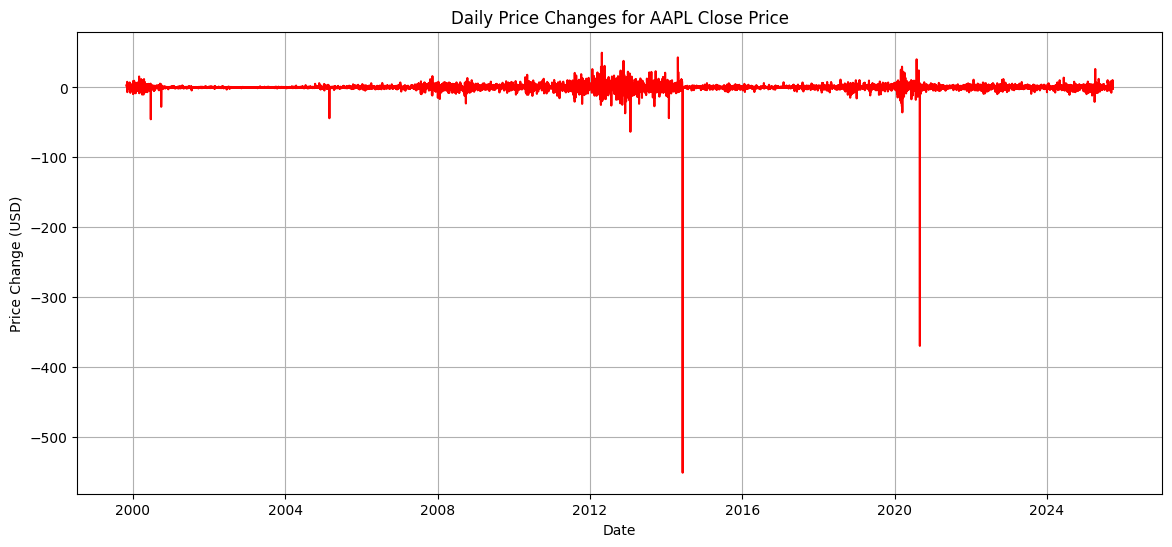

In [52]:
stock['PriceChange'] = stock['close'].diff()

plt.figure(figsize=(14,6))
plt.plot(stock.index, stock['PriceChange'], color='red')
plt.title('Daily Price Changes for AAPL Close Price')
plt.xlabel('Date')
plt.ylabel('Price Change (USD)')
plt.grid(True)
plt.show()


#### Task 19: Answer the following questions (based on task 18):
* On which date did the largest negative daily price change occur, and what was the magnitude of the decrease?
* What significant events or occurrences took place on that particular date that could potentially account for the observed change?

In [ ]:
largest_drop_date = stock['PriceChange'].idxmin()
largest_drop_value = stock['PriceChange'].min()

print(largest_drop_date)
print(largest_drop_value)
#The largest drop in happened on 2014/06/09, with a -551.87 decrease probably due to company news or market events on that day.

2014-06-09 00:00:00
-551.87


#### Task 20: Based on the current dataset, create `two` interesting data analytics questions and answer them using the pandas techniques you've learned so far.

In [54]:
#1: Which year had the highest average closing price, and what was it
yearly_avg_close = stock['close'].resample('Y').mean()
highest_avg_close_year = yearly_avg_close.idxmax()
highest_avg_close_value = yearly_avg_close.max()
print(highest_avg_close_year, highest_avg_close_value)

#2: What is the average daily trading volume on the first day of the week vs last (business days)
avg_volume_by_day = stock['volume'].groupby(stock.index.dayofweek).mean()
monday_avg_volume = avg_volume_by_day[0]
friday_avg_volume = avg_volume_by_day[4]
print(monday_avg_volume, friday_avg_volume)

2012-12-31 00:00:00 574.0822693989071
32953160.654585797 34898711.09319527


C:\Users\cxina\AppData\Local\Temp\ipykernel_61292\1103690672.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_close = stock['close'].resample('Y').mean()
